Get the first dataset with 30 attributes plus result from R. M. Mohammad. 

In [1]:
import pandas as pd

url="./Phishing.csv"
df=pd.read_csv(url)

df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


Get the second dataset with 111 attributes plus result from Vrbančič.

In [2]:
url2="https://raw.githubusercontent.com/GregaVrbancic/Phishing-Dataset/master/vrbancic_phishing_dataset.csv"
df2=pd.read_csv(url2)

df2.head(10)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
5,1,0,0,2,0,0,0,0,0,0,...,1,3,3,3591,1,0,0,0,0,1
6,2,0,0,0,0,0,0,0,0,0,...,1,2,2,291,0,0,0,0,0,0
7,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3134,1,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3596,1,1,0,0,0,0
9,1,0,0,2,0,0,0,0,0,0,...,1,2,1,14397,1,0,0,0,0,1


On the first dataset convert value of -1 to 0 for result

In [3]:
df['Result'].values[df['Result'].values < 0] = 0

Next we will replace any missing values with the mean value for that column. This will be done for both datasets.

In [4]:
from sklearn.impute import SimpleImputer

# Use mean value for any nan values
df.fillna(df.mean(), inplace=True)
df2.fillna(df.mean(), inplace=True)

Next we will split both of our datasets into section for training and testing.

In [5]:
from sklearn.model_selection import train_test_split

# split data up into training and test data
x = df.iloc[:,0:30].values.astype(int)
y = df.iloc[:,30].values.astype(int)

# split data up into training and test data
x2 = df2.iloc[:,0:111].values.astype(int)
y2 = df2.iloc[:,111].values.astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

Import `numpy` and set a random seed so that random values will be the same each time we run this notebook.

In [6]:
import numpy as np

np.random.seed(7)

In [7]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr2 = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)
logisticRegr2.fit(x_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1]:
from sklearn.metrics import precision_recall_fscore_support

t = precision_recall_fscore_support(y_test, logisticRegr.predict(x_test), average='micro')
t2 = precision_recall_fscore_support(y_test2, logisticRegr2.predict(x_test2), average='micro')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



NameError: name 'y_test' is not defined

(0.9217146080090243, 0.9217146080090243, 0.9217146080090243, None)

In [10]:
from sklearn import metrics

y_pred=logisticRegr.predict(x_test)
y_pred2=logisticRegr2.predict(x_test2)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix2 = metrics.confusion_matrix(y_test2, y_pred2)

In [11]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

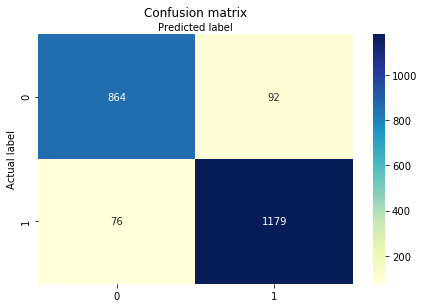

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9240162822252375
Precision: 0.9276160503540519
Recall: 0.9394422310756972


Text(0.5, 257.44, 'Predicted label')

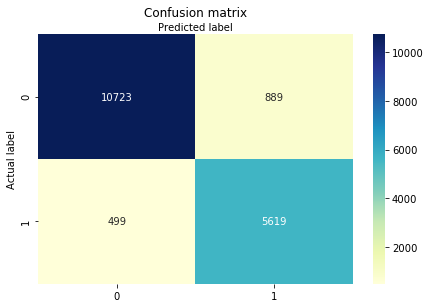

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2))
print("Recall:",metrics.recall_score(y_test2, y_pred2))

Accuracy: 0.9217146080090243
Precision: 0.8633988936693301
Recall: 0.9184373978424322


In [16]:
# Imports
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *

Using TensorFlow backend.


We have experimented with a variety of values for the dense layers below.

*Running the same parameters multiple times can result in slightly different results.*

30, 40, 1 = 95.52%

40, 30, 1 = 91.30%

30, 50, 1 = 91.30%

40, 50, 1 = 95.66%

50, 60, 1 = 96.20%

60, 70, 1 = 91.30%

100, 120, 1 = 96.25%

200, 240, 1 = 96.47%

400, 480, 1 = 96.88%

800, 960, 1 = 96.70%

1200, 1300, 1 = 91.30%

1600, 1920, 1 = 96.79%

3200, 3840, 1 = 96.83%

In [60]:
# Model building using the Sequential API
model = Sequential()

# This model actually seems to work better with higher numbers
model.add(Dense(1600, activation='relu',
          kernel_initializer='uniform',input_dim=x.shape[1]))
model.add(Dense(1920, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(1,  activation='sigmoid',
          kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 1200)              37200     
_________________________________________________________________
dense_44 (Dense)             (None, 1300)              1561300   
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 1301      
Total params: 1,599,801
Trainable params: 1,599,801
Non-trainable params: 0
_________________________________________________________________


Experiments using the second dataset and various neuron counts.

135, 111, 1 = 92.55%

145, 111, 1 = 92.30%

270, 222, 1 = 93.73%

540, 444, 1 = 91.84%

600, 450, 1 = 92.79%

In [55]:
# Model building using the Sequential API
model2 = Sequential()

model2.add(Dense(135, activation='relu',
          kernel_initializer='uniform',input_dim=x2.shape[1]))
model2.add(Dense(111, activation='relu',
          kernel_initializer='uniform'))
model2.add(Dense(1,  activation='sigmoid',
          kernel_initializer='uniform'))

model2.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [56]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 135)               15120     
_________________________________________________________________
dense_47 (Dense)             (None, 111)               15096     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 112       
Total params: 30,328
Trainable params: 30,328
Non-trainable params: 0
_________________________________________________________________


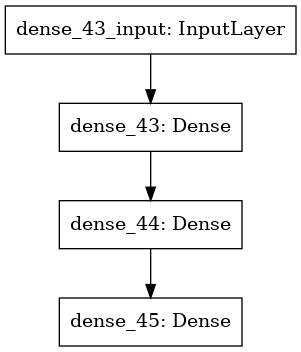

In [57]:
import tensorflow as tf
import keras

keras.utils.plot_model(model, to_file='model.png')

In [58]:
from keras import callbacks

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5, restore_best_weights=True)

In [61]:
history = model.fit(x_train, y_train, batch_size=64, epochs=128, verbose=1, callbacks=[es_cb])

scores = model.evaluate(x_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Epoch 1/128
8844/8844 [==============================] - 10s 1ms/step - loss: 0.1860 - accuracy: 0.9239
Epoch 2/128
8844/8844 [==============================] - 10s 1ms/step - loss: 0.1295 - accuracy: 0.9448
Epoch 3/128
8844/8844 [==============================] - 10s 1ms/step - loss: 0.1129 - accuracy: 0.9523
Epoch 4/128
8844/8844 [==============================] - 10s 1ms/step - loss: 0.0988 - accuracy: 0.9569
Epoch 5/128
8844/8844 [==============================] - 10s 1ms/step - loss: 0.0908 - accuracy: 0.9603
Epoch 6/128
8844/8844 [==============================] - 11s 1ms/step - loss: 0.0797 - accuracy: 0.9661
Epoch 7/128
8844/8844 [==============================] - 11s 1ms/step - loss: 0.0724 - accuracy: 0.9704
Epoch 8/128
8844/8844 [==============================] - 11s 1ms/step - loss: 0.0663 - accuracy: 0.9717
Epoch 9/128
8844/8844 [==============================] - 19s 2ms/step - loss: 0.0659 - accuracy: 0.9738
Epoch 10/128
8844/8844 [==============================] - 21s 2m

In [31]:
history2 = model2.fit(x_train2, y_train2, batch_size=64, epochs=128, verbose=1, callbacks=[es_cb])

scores2 = model2.evaluate(x_test2, y_test2)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores2[1]*100))

Epoch 1/128
70917/70917 [==============================] - 4s 50us/step - loss: 0.9217 - accuracy: 0.8040
Epoch 2/128
70917/70917 [==============================] - 3s 47us/step - loss: 0.3172 - accuracy: 0.8834
Epoch 3/128
70917/70917 [==============================] - 3s 46us/step - loss: 0.2667 - accuracy: 0.8957
Epoch 4/128
70917/70917 [==============================] - 3s 46us/step - loss: 0.2304 - accuracy: 0.9056
Epoch 5/128
70917/70917 [==============================] - 3s 49us/step - loss: 0.2360 - accuracy: 0.9034
Epoch 6/128
70917/70917 [==============================] - 4s 55us/step - loss: 0.2162 - accuracy: 0.9084
Epoch 7/128
70917/70917 [==============================] - 3s 44us/step - loss: 0.2095 - accuracy: 0.9119
Epoch 8/128
70917/70917 [==============================] - 3s 42us/step - loss: 0.2105 - accuracy: 0.9103
Epoch 9/128
70917/70917 [==============================] - 3s 44us/step - loss: 0.2087 - accuracy: 0.9125
Epoch 10/128
70917/70917 [====================

TDLHBA hyperparameters

In [43]:
model_TDLHBA = Sequential()

model_TDLHBA.add(Dense(135, activation='relu',
          kernel_initializer='uniform',input_dim=111))
model_TDLHBA.add(Dense(111, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

adam = Adam(lr=0.0017470)
model_TDLHBA.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 135)               4185      
_________________________________________________________________
dense_2 (Dense)              (None, 111)               15096     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 112       
Total params: 19,393
Trainable params: 19,393
Non-trainable params: 0
_________________________________________________________________


In [45]:
history_TDLHBA = model_TDLHBA.fit(x_train, y_train, batch_size=10, epochs=100, verbose=1, callbacks=[es_cb])

scores = model_TDLHBA.evaluate(x_test, y_test)
print('\nAccuracy score of the Neural Network with TDLHBA hyperparameter settings {0:.2f}%'.format(scores[1]*100))

ValueError: Error when checking input: expected dense_4_input to have shape (111,) but got array with shape (30,)